In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline 

***COVID19 package***

In [2]:
from importCOVID19 import COVID19
import  pandas as pd
import seaborn as sns

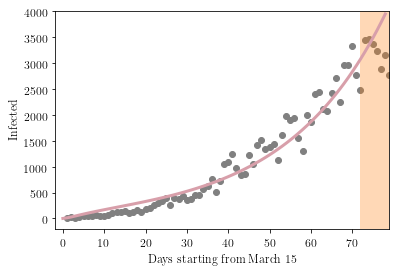

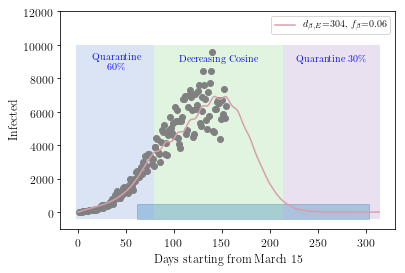

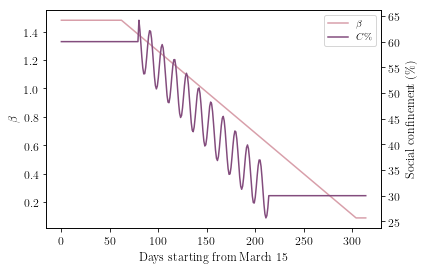

In [3]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

mxCOVID19 = COVID19('SEIRq', '20200815_Start1503.csv')
#mxCOVID19.readStat('20200717_Results/')
# pars = [qtauSpeed,[(dayS,perS),(dayE,perE),(amplitude,period)],[(dayS,perS),(dayE,perE)]]
pars = [20,[(60,60),(120,60),(0,1)],[(60,20),(120,20),(1,1)]]
mxCOVID19.setModel('SEIRfullCOS',pars)
mxCOVID19.getFitData('TOT')
x = np.arange(79)
bestx = [304,1]
besty = [0.06,1]

# Reading parameters fit up to 2020/05/15
fitpars = pd.read_csv('20200525fits.csv')
# Getting beta and eta
#print(fitpars[fitpars['ID']=='TOT'].values[0])
beta,eta,R0 = fitpars[fitpars['ID']=='TOT'].values[0][1:4]
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']
#print(R0)
# Setting the model parameters
# beta, tau, q, delta, eta, epsilon
colors = sns.cubehelix_palette(10)
q = 1; epsilon = 0.2; tau = q*2/3; delta = 1/10
mxCOVID19.parVals=tuple([beta,tau,q,delta,eta,epsilon])
yValsModel = mxCOVID19.getModel(x)[:,1]
plt.plot(x,yValsModel,color=colors[2],linewidth=3)
plt.scatter(mxCOVID19.realDays.values,mxCOVID19.fitData['Infected'],color='gray')
plt.fill([72,79,79,72],[-200,-200,4000,4000], new_colors[1], alpha=0.3)#, edgecolor='r')

plt.xlim(-2,79)
plt.ylim(-200,4000)
plt.xlabel('Days starting from March 15')
plt.ylabel('Infected')
plt.savefig('Figure11.png',dpi=600)
plt.show()

x = np.arange(315)
npts = len(bestx)-1
height = 900
bg = -400 + height*npts
for indx in range(npts):
    pls = indx*10*2
    # pars = [qtauSpeed,[(dayS,perS),(dayE,perE),(amplitude,period)],[(dayS,perS),(dayE,perE)]]
    # pars = [20,[(79,60),(900+0*pls,30),(5,1)],[(79,20),(200,1),(15,1)]]
    strt = 175; end = 300; step = (end-strt)/npts
    #dayVal = strt+step*indx
    dayVal = bestx[indx]
    pars = [20,[(79,60),(214,30),(5,2)],[(62,beta),(dayVal,beta*(besty[indx])),(0,2)]] #np.interp(dayVal, xp, yp)
    #pars = [20,[(72,60),(214,30),(5,2)],[(72,beta),(125.5,beta*(0.6925)),(0.9,2)]]
    mxCOVID19.setCOSpars(pars)
    yValsModel = mxCOVID19.getModel(x)[:,1]
    thislabel = r'$d_{\beta,E}$='+str(int(dayVal))+r', $f_{\beta}$='+"{:.2f}".format(besty[indx])
    plt.plot(x,yValsModel,label=thislabel,color=colors[2],zorder=20)#,color='r')
    plt.fill([62,bestx[indx],bestx[indx],62],[bg-height*indx,bg-height*indx,bg-height*(indx+1),bg-height*(indx+1)], color=new_colors[indx], alpha=0.3)#, edgecolor='r')
plt.legend(prop={'size': 10})
plt.ylim(-1000,12000)
plt.fill([-2,79,79,-2],[-400,-400,10000,10000], colors[npts], alpha=0.2,zorder=0)#, edgecolor='r')
plt.text(40, 8500,'Quarantine\n60\%', color='b', fontsize=10, horizontalalignment='center')
plt.fill([79,214,214,79],[-400,-400,10000,10000], colors[npts+1], alpha=0.2,zorder=0)#, edgecolor='r')
plt.text((214+79)/2, 9000,'Decreasing Cosine', color='b', fontsize=10, horizontalalignment='center')
plt.fill([214,315,315,214],[-400,-400,10000,10000], colors[npts+2], alpha=0.2,zorder=0)#, edgecolor='r')
plt.text((214+315)/2, 9000,'Quarantine 30\%', color='b', fontsize=10, horizontalalignment='center')
#plt.xlim(0,80)
#plt.ylim(0,4000)
plt.scatter(mxCOVID19.realDays.values,mxCOVID19.fitData['Infected'],color='gray',zorder=10)
plt.xlabel('Days starting from March 15')
plt.ylabel('Infected')
plt.savefig('Figure12u.png',dpi=600)
plt.show()

fig, axs = plt.subplots(sharex=True)

y = [ mxCOVID19.getqtauCOS(xV) for xV in x ]
#plt.plot(x,y)
for indx in range(npts):
    dayVal = bestx[indx]
    pars = [20,[(79,60),(214,30),(5,2)],[(62,beta),(dayVal,beta*(besty[indx])),(0,2)]] #np.interp(dayVal, xp, yp)
    mxCOVID19.setCOSpars(pars)
    y = [ mxCOVID19.getbetaCOS(xV,beta)[0] for xV in x ]
    ln1 = axs.plot(x,y,color=colors[2],label=r'$\beta$')
plt.xlabel('Days starting from March 15')
axs.set_ylabel(r'$\beta$')
twinaxs = axs.twinx()
y= [ mxCOVID19.getpercentage(xV) for xV in x ]
ln2 = twinaxs.plot(x,y,color=colors[6],label=r'$C\%$')
twinaxs.set_ylabel('Social confinement (\%)')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
axs.legend(lns, labs, loc=0,prop={'size': 10})
plt.savefig('Figure12d.png',dpi=600)
plt.show()

#y = [ percentage(x,pars[1][0],pars[1][1],pars[1][2]) for xV in x ]
#plt.plot(x,y)
#print('eta:',R0/(beta*0.001))